In [1]:
import pandas as pd
import cv2
import numpy as np
from random import shuffle
from __future__ import division

In [2]:
import os
import tflearn
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [3]:
IMG_SIZE = 48
LR = 1e-3
MODEL_NAME = 'emotion-{}-{}.model'.format(LR, '12conv-basic')

In [4]:
def create_training_data(emotion,pixels):
    
    training_data = []
    for index, data in enumerate(pixels):
        data = data.split(' ')
        data = np.array(data, np.float64)
        label = np.zeros(7)
        label[emotion[index]] = 1        
        training_data.append([data, label])
        
    shuffle(training_data)
    print(len(training_data))
    np.save('training_data.npy',training_data)
    return training_data

In [5]:
#df = pd.read_csv('Dataset/dataset.csv')
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
#emotion = df['emotion'][:15000]
#pixels = df['pixels'][:15000]

In [6]:
#training_data = create_training_data(emotion,pixels)
training_data = np.load('training_data.npy')
print(len(training_data))

15000


In [7]:
print((training_data[0][1]))

[ 0.  0.  0.  0.  1.  0.  0.]


In [8]:
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 7, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

In [9]:
if os.path.exists("{}.meta".format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('Model loaded!')

INFO:tensorflow:Restoring parameters from E:\My_Arena\PythonCodes\Deep Learning with Neural Networks\9-Emotion Recognition\emotion-0.001-12conv-basic.model
Model loaded!


In [10]:
train = training_data[:-500]
test = training_data[-500:]

X = np.array([i[0] for i in train], dtype=np.float64).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = np.array([i[1] for i in train], dtype=np.float64)

test_x = np.array([i[0] for i in test], dtype=np.float64).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_y =np.array([i[1] for i in test], dtype=np.float64)

In [32]:
#model.fit({'input': X}, {'targets': Y}, n_epoch=75, validation_set=({'input': test_x}, {'targets': test_y}),snapshot_step=500, show_metric=True, run_id=MODEL_NAME)
#model.save(MODEL_NAME)

Training Step: 43059  | total loss: 0.29671 | time: 118.316s
| Adam | epoch: 075 | loss: 0.29671 - acc: 0.8970 -- iter: 14464/14500
Training Step: 43060  | total loss: 0.31765 | time: 119.820s
| Adam | epoch: 075 | loss: 0.31765 - acc: 0.8948 | val_loss: 1.20349 - val_acc: 0.6620 -- iter: 14500/14500
--
INFO:tensorflow:E:\My_Arena\PythonCodes\Deep Learning with Neural Networks\9-Emotion Recognition\emotion-0.001-12conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


In [68]:
data = cv2.resize(cv2.imread('Test/fear.jpg',0), (IMG_SIZE, IMG_SIZE)).reshape(IMG_SIZE, IMG_SIZE, 1)
model_out = model.predict([data])[0]

In [69]:
print(model_out)

[0.0648440569639206, 0.006641908548772335, 0.9130827188491821, 0.011424630880355835, 0.0003099228488281369, 0.0021528364159166813, 0.0015439247945323586]


In [70]:
model_out.index(max(model_out))
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

2

In [36]:
df = pd.read_csv('Dataset/dataset.csv')
emotions = df['emotion'][15000:20000]
pixels = df['pixels'][15000:20000]

In [37]:
count=0

emotions = list(emotions)

for index,data in enumerate(pixels):
    data = np.array(data.split(' '), dtype=np.float64).reshape(IMG_SIZE, IMG_SIZE, 1)
    emotion = emotions[index]
    model_out = model.predict([data])[0]
    result = model_out.index(max(model_out))
    
    if emotion == result:
        count+=1
        
print("accuracy is", count/len(emotions))

accuracy is 0.414


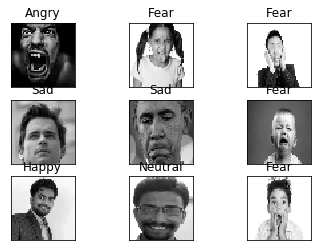

In [102]:
fig = plt.figure()
for num, image in enumerate(os.listdir('Test/')):
    
    #print(image)
    
    img_data = cv2.resize(cv2.imread('Test/'+image,0),(IMG_SIZE, IMG_SIZE))

    y = fig.add_subplot(3,3, num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE, 1)
    model_out = model.predict([data])[0]

    str_label = model_out.index(max(model_out))
    
    emotion_name = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
    
    y.imshow(img_data, cmap='gray')
    plt.title(emotion_name[str_label])
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()